In [3]:
import pandas
import os
import glob
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import seaborn as sns
import cv2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report

import seaborn as sns
import glob

In [4]:
main_path = "chest_xray/"

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
train_path = os.path.join(main_path,"train")
test_path=os.path.join(main_path,"test")
val_path=os.path.join(main_path,"val")

pneumonia_train_images = glob.glob(train_path+"/PNEUMONIA/*.jpeg")
normal_train_images = glob.glob(train_path+"/NORMAL/*.jpeg")

pneumonia_val_images = glob.glob(val_path+"/PNEUMONIA/*.jpeg")
normal_val_images = glob.glob(val_path+"/NORMAL/*.jpeg")

pneumonia_test_images = glob.glob(test_path+"/PNEUMONIA/*.jpeg")
normal_test_images = glob.glob(test_path+"/NORMAL/*.jpeg")

In [6]:
data = pd.DataFrame(np.concatenate([[0]*len(normal_train_images) , [1] *  len(pneumonia_train_images)]),columns=["class"])

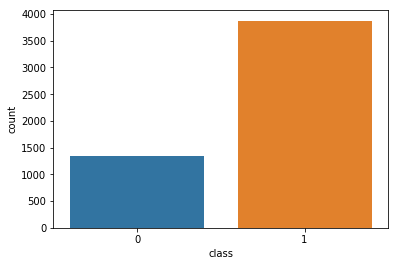

In [7]:
sns.countplot(data['class'],data=data)

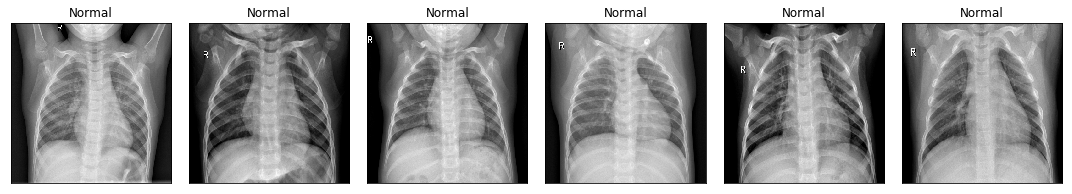

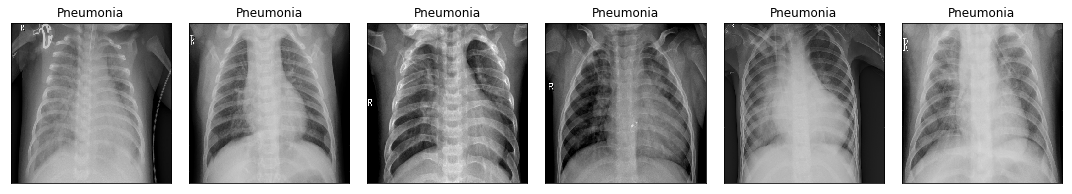

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    img = cv2.imread(normal_train_images[i])
    img = cv2.resize(img, (512,512))
    ax.imshow(img)
    ax.set_title("Normal")
fig.tight_layout()    
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(pneumonia_train_images[i])
    img = cv2.resize(img, (512,512))
    ax.imshow(img)
    ax.set_title("Pneumonia")
fig.tight_layout()    
plt.show()


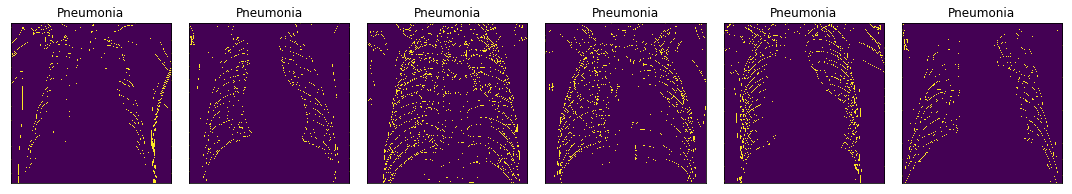

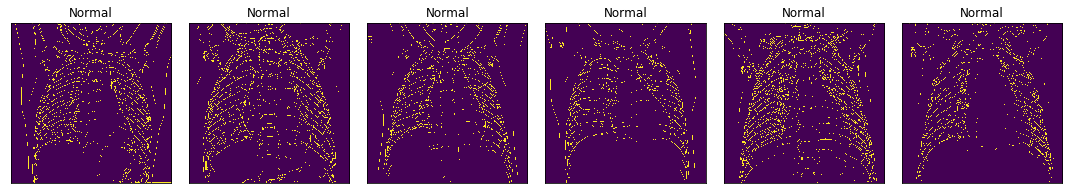

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(pneumonia_train_images[i])
    img = cv2.resize(img, (512,512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.Canny(img, 80, 100)
    ax.imshow(img)
    ax.set_title("Pneumonia")
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(normal_train_images[i])
    img = cv2.resize(img, (512,512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.Canny(img, 80, 100)
    ax.imshow(img)
    ax.set_title("Normal")
fig.tight_layout()    
plt.show()

In [10]:
val_Pneumonia = len(os.listdir(val_path+'/PNEUMONIA'))
val_Normal =len(os.listdir(val_path+'/NORMAL'))
print(f'len(val_Normal) = {val_Normal},len(val_Pneumonia)={val_Pneumonia}')

len(val_Normal) = 8,len(val_Pneumonia)=8


In [11]:
from distutils.dir_util import copy_tree

copy_tree(main_path,'temp')

['temp\\chest_xray\\.DS_Store',
 'temp\\chest_xray\\test\\.DS_Store',
 'temp\\chest_xray\\test\\NORMAL\\IM-0001-0001.jpeg',
 'temp\\chest_xray\\test\\NORMAL\\IM-0003-0001.jpeg',
 'temp\\chest_xray\\test\\NORMAL\\IM-0005-0001.jpeg',
 'temp\\chest_xray\\test\\NORMAL\\IM-0006-0001.jpeg',
 'temp\\chest_xray\\test\\NORMAL\\IM-0007-0001.jpeg',
 'temp\\chest_xray\\test\\NORMAL\\IM-0009-0001.jpeg',
 'temp\\chest_xray\\test\\NORMAL\\IM-0010-0001.jpeg',
 'temp\\chest_xray\\test\\NORMAL\\IM-0011-0001-0001.jpeg',
 'temp\\chest_xray\\test\\NORMAL\\IM-0011-0001-0002.jpeg',
 'temp\\chest_xray\\test\\NORMAL\\IM-0011-0001.jpeg',
 'temp\\chest_xray\\test\\NORMAL\\IM-0013-0001.jpeg',
 'temp\\chest_xray\\test\\NORMAL\\IM-0015-0001.jpeg',
 'temp\\chest_xray\\test\\NORMAL\\IM-0016-0001.jpeg',
 'temp\\chest_xray\\test\\NORMAL\\IM-0017-0001.jpeg',
 'temp\\chest_xray\\test\\NORMAL\\IM-0019-0001.jpeg',
 'temp\\chest_xray\\test\\NORMAL\\IM-0021-0001.jpeg',
 'temp\\chest_xray\\test\\NORMAL\\IM-0022-0001.jpeg',
 '

In [12]:
for i in ['/NORMAL/','/PNEUMONIA/']:
    for img in os.listdir(train_path+i)[:191]:
        os.replace(train_path+i+img, val_path+i+img)

In [13]:
val_Pneumonia = len(os.listdir(val_path+'/PNEUMONIA'))
val_Normal =len(os.listdir(val_path+'/NORMAL'))
print(f'len(val_Normal) = {val_Normal},len(val_Pneumonia)={val_Pneumonia}')

len(val_Normal) = 199,len(val_Pneumonia)=199


In [14]:
# define the type of augmentation techniques we will apply.
train_Datagen = ImageDataGenerator(
    rescale =1/255,
#     shear_range=10,
    zoom_range = 0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
#     rotation_range=20,
    fill_mode = 'nearest',
)
val_datagen = ImageDataGenerator(
    rescale =1/255,
#     shear_range=10,
#     zoom_range = 0.2,
#     horizontal_flip = True,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     rotation_range=20,
#     fill_mode = 'nearest',
)

In [15]:
input_shape = (512,512,3)

In [18]:
base_model = tf.keras.applications.ResNet50V2(weights='imagenet', input_shape=input_shape, include_top=False)
import tensorflow
for layer in base_model.layers:
    layer.trainable = False
    

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation = 'relu',kernel_regularizer= tensorflow.keras.regularizers.l2(l2=0.1)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 16, 16, 2048)      23564800  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 23,827,201
Trainable params: 262,401
Non-trainable params: 23,564,800
_________________________________________________________________


In [19]:
train_generator=train_Datagen.flow_from_directory(
    train_path,
    target_size=(512,512),
    batch_size= 32,
    class_mode='binary'
)
validation_generator = val_datagen.flow_from_directory(
        test_path,
        target_size=(512,512),
        batch_size=32,
        class_mode='binary'
)
test_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(512,512),
    batch_size=32,
    class_mode='binary'
)

Found 4834 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 398 images belonging to 2 classes.


In [21]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

initial_learning_rate = 1e-3
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=755,
    decay_rate=0.9,
    staircase=True)

model.compile(optimizer= Adam(lr_schedule), loss='binary_crossentropy', metrics=["accuracy"])

#callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

history = model.fit(train_generator,
                    epochs=10,
                    steps_per_epoch = 4834 // 32,
                    validation_data = validation_generator,
                    validation_steps = 624 // 32)

Epoch 1/10
151/151 [==============================] - 313s 2s/step - loss: 2.9488 - accuracy: 0.8936 - val_loss: 0.4243 - val_accuracy: 0.8898
Epoch 2/10
151/151 [==============================] - 304s 2s/step - loss: 0.2849 - accuracy: 0.9254 - val_loss: 0.5602 - val_accuracy: 0.7566
Epoch 3/10
151/151 [==============================] - 300s 2s/step - loss: 0.2706 - accuracy: 0.9234 - val_loss: 0.3658 - val_accuracy: 0.8766
Epoch 4/10
151/151 [==============================] - 300s 2s/step - loss: 0.3161 - accuracy: 0.9132 - val_loss: 0.3592 - val_accuracy: 0.9112
Epoch 5/10
151/151 [==============================] - 313s 2s/step - loss: 0.2690 - accuracy: 0.9250 - val_loss: 0.3504 - val_accuracy: 0.9046
Epoch 6/10
151/151 [==============================] - 317s 2s/step - loss: 0.2739 - accuracy: 0.9217 - val_loss: 0.3561 - val_accuracy: 0.8832
Epoch 7/10
151/151 [==============================] - 316s 2s/step - loss: 0.2427 - accuracy: 0.9354 - val_loss: 0.3471 - val_accuracy: 0.9062

In [22]:
model.evaluate(test_generator)[1]

13/13 [==============================] - 14s 1s/step - loss: 0.2950 - accuracy: 0.9146


0.9145728349685669

In [23]:
model.evaluate(validation_generator)[1]

20/20 [==============================] - 15s 722ms/step - loss: 0.3466 - accuracy: 0.9038


0.9038461446762085

In [24]:
for layer in base_model.layers[:165]:
    layer.trainable = False
for layer in base_model.layers[165:]:
    layer.trainable = True

In [26]:
initial_learning_rate = 1e-5
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=755,
    decay_rate=0.9,
    staircase=True)
model.compile(optimizer=tf.keras.optimizers.Adam(lr_schedule),  # Very slow learning rate
              loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tensorflow.keras.metrics.BinaryAccuracy()])

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

history_new = model.fit(train_generator,
                        epochs=10,
                        steps_per_epoch = 4834 // 32,
                        validation_data = validation_generator,
                        validation_steps = 624 // 32,
                        callbacks=[es])

Epoch 1/10


C:\Users\achar\Anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:5017: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`binary_crossentropy` received `from_logits=True`, but the `output`'
C:\Users\achar\Anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:5017: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`binary_crossentropy` received `from_logits=True`, but the `output`'


151/151 [==============================] - ETA: 0s - loss: 0.2929 - binary_accuracy: 0.9284

C:\Users\achar\Anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:5017: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`binary_crossentropy` received `from_logits=True`, but the `output`'


151/151 [==============================] - 318s 2s/step - loss: 0.2929 - binary_accuracy: 0.9284 - val_loss: 0.4169 - val_binary_accuracy: 0.8487


In [29]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

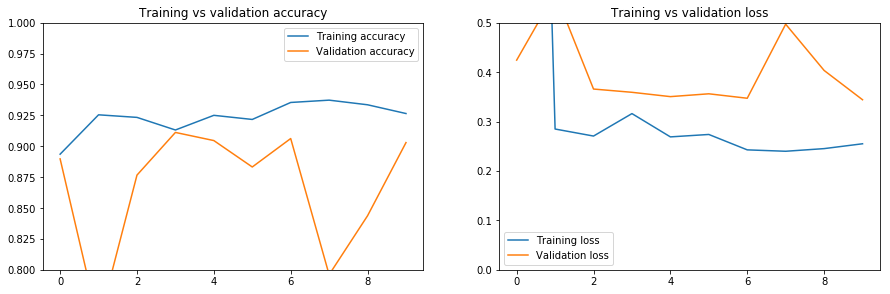

In [30]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.ylim(0.8, 1)
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.ylim(0, 0.5)
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [31]:
model.evaluate(validation_generator)[1]

20/20 [==============================] - 13s 618ms/step - loss: 0.4161 - binary_accuracy: 0.8494


0.8493589758872986

In [32]:
model.evaluate(test_generator)[1]

13/13 [==============================] - 9s 616ms/step - loss: 0.2056 - binary_accuracy: 0.9523


0.9522613286972046

In [33]:
y_true=test_generator.classes[test_generator.index_array] 

In [34]:
y_pred = np.squeeze(model.predict_classes(test_generator))

C:\Users\achar\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [35]:
print(classification_report(y_true,y_pred))

             precision    recall  f1-score   support

          0       0.97      0.93      0.95       199
          1       0.94      0.97      0.95       199

avg / total       0.95      0.95      0.95       398



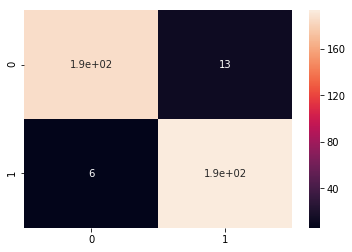

In [36]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_true,y_pred),annot=True)